In [2]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#Aloow image embeding in notebook
%matplotlib inline

In [3]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    #Get all subdirectories of data_dir. Each represents a label.
    directories=[d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels=[]
    images=[]
    for d in directories:
        label_dir=os.path.join(data_dir,d)
        file_names=[os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        # for each label, load its image and add them to the image list
        #and add the label number (i.e., directory name) to the lavels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

# Load training and testing datasets

ROOT_PATH="C:/Users/SHIVLEON/traffic"
train_data_dir=os.path.join(ROOT_PATH, "BelgiumTSC_Training/Training")
test_data_dir=os.path.join(ROOT_PATH, "BelgiumTSC_Testing/Testing")

images, labels=load_data(train_data_dir)

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


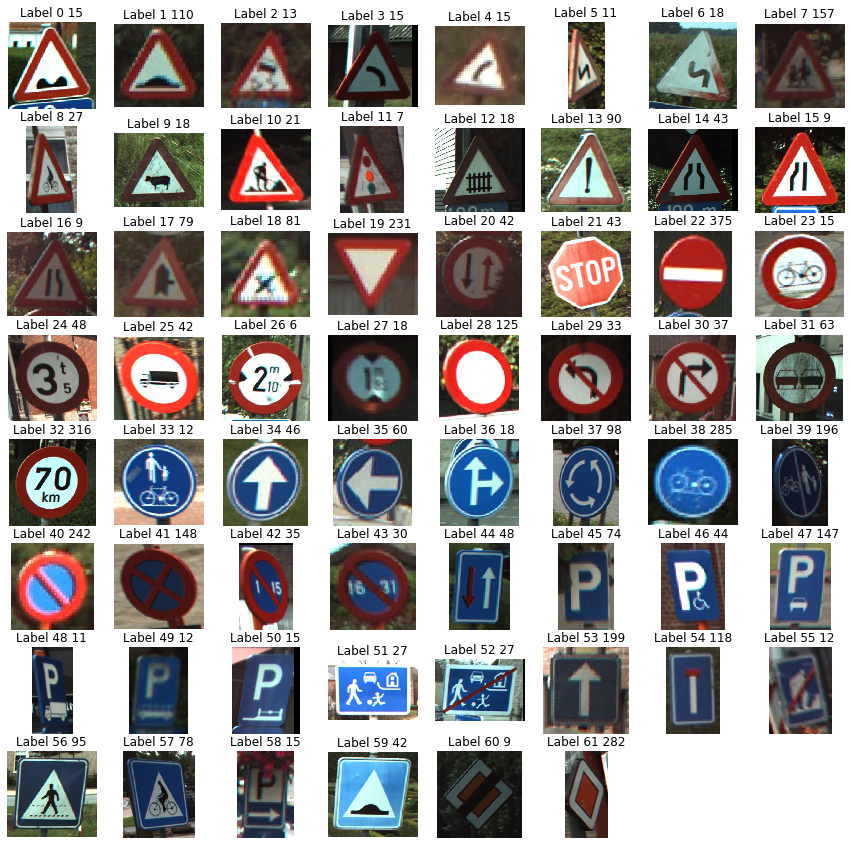

In [5]:
def display_images_and_labels(images, labels):
    #Display the first image of each label
    unique_labels= set(labels)
    plt.figure(figsize=(15,15))
    i=1
    for label in unique_labels:
        # Pick the first image for each label
        image=images[labels.index(label)]
        plt.subplot(8,8,i) # a grid of 8x8
        plt.axis('off')
        plt.title("Label {0} {1}".format(label,labels.count(label)))
        i+=1
        _=plt.imshow(image)
    plt.show()
    
display_images_and_labels(images,labels)
        

In [6]:
for i in images[:5]:
    print("Shape: {0}, min: {1}, max: {2}".format(i.shape,i.min(),i.max()))
    
#Resizing the image

image32=[skimage.transform.resize(image,(32,32), mode='constant') for image in images]

Shape: (141, 142, 3), min: 0, max: 255
Shape: (120, 123, 3), min: 0, max: 255
Shape: (105, 107, 3), min: 0, max: 255
Shape: (94, 105, 3), min: 7, max: 255
Shape: (128, 139, 3), min: 0, max: 255


In [7]:
# Create a graph to hold the model.
graph0= tf.Graph()

In [8]:
with graph0.as_default():
    images_ph= tf.placeholder(tf.float32,[None,32,32,3])
    labels_ph= tf.placeholder(tf.int32,[None])
    #[batch size, height, width, channels] eg [None, 32, 32, 3] 
    print(labels_ph)
    #Using ReLU actication function {f(x)=max(0,x)}
    #Flatten input from : [None, height, width, channels]
    #To: [None, height*width*channels]==[None,3072]
    images_flat=tf.contrib.layers.flatten(images_ph)

    #fully connected layer generates logits of size [None, 62]
    logitss= tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)
    print(logitss.graph)
    
    #Convert logits to label indexes
    #Shape [None], which is a 1D vector of lenght== batch_size
    predicted_labels=tf.argmax(logitss,1)
    n=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logitss, labels=labels_ph,)
    loss=tf.reduce_mean(n)
    print(loss)
    
    #Create training operation
    train= tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    
    #An initialization operation to execute before taining.
    init=tf.global_variables_initializer()
    
    

Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("Mean:0", shape=(), dtype=float32)


In [9]:
sessions=tf.Session(graph=graph0)

In [10]:
sessions.run(init)    

NameError: name 'test_images' is not defined